In [7]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [9]:
import io

In [11]:
from google.colab import files
uploaded = files.upload()

Saving nutrients_csvfile.csv to nutrients_csvfile (1).csv


In [12]:
df = pd.read_csv(io.StringIO(uploaded['nutrients_csvfile.csv'].decode('utf-8')))
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


# **DATA** **CLEANING**

In [13]:
df=df.replace("t",0)
df=df.replace("t'",0)


In [14]:
df.isnull().any()

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber       False
Carbs       False
Category    False
dtype: bool

In [15]:
df.shape[0]

335

In [16]:
df = df.dropna()

In [17]:
df.shape[0]

332

In [18]:
df=df.replace(",","", regex=True)



In [19]:
#print(df.loc[[91]])
df=df.drop(91)

In [20]:
print(df.loc[[81]])

        Food Measure Grams Calories Protein Fat Sat.Fat Fiber Carbs  \
81  Mackerel   3 oz.    85      155      18   9       0     a     0   

        Category  
81  Fish Seafood  


In [21]:
df=df.drop(81)

In [22]:

df['Grams']=pd.to_numeric(df['Grams'])
df['Calories']=pd.to_numeric(df['Calories'])
df['Protein']=pd.to_numeric(df['Protein'])
df['Fat']=pd.to_numeric(df['Fat'])
df['Sat.Fat']=pd.to_numeric(df['Sat.Fat'])
df['Fiber']=pd.to_numeric(df['Fiber'])
df['Carbs']=pd.to_numeric(df['Carbs'])

# **DATA VISUALIZATION**

In [23]:
Category_df = df.groupby("Category")
Protein_5 = Category_df['Protein'].sum().sort_values(ascending=False)[:5]


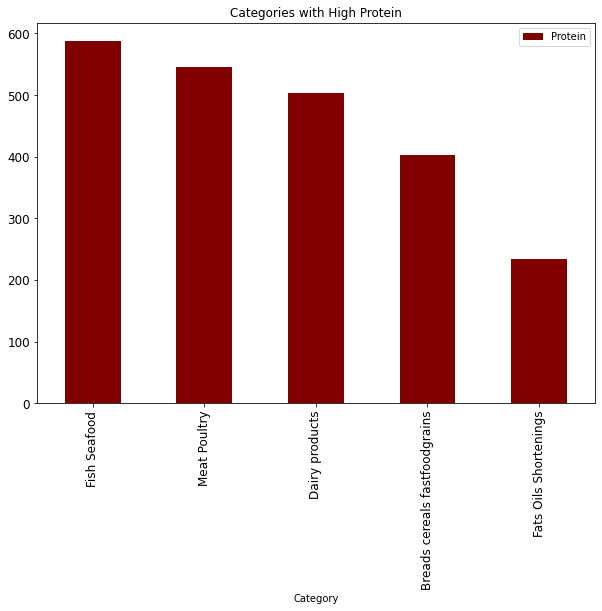

In [24]:
ax = Protein_5.plot(kind='bar', title ="Categories with High Protein", figsize=(10,7), legend=True, fontsize=12, color='maroon')


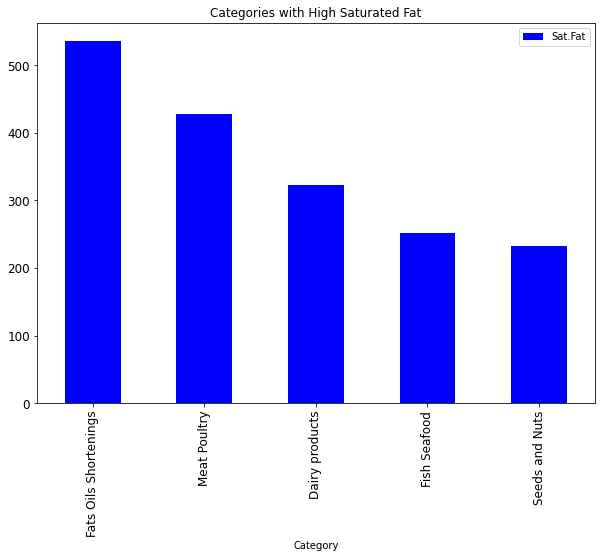

In [25]:

Saturated_Fat_5 = Category_df['Sat.Fat'].sum().sort_values(ascending=False)[:5]
ax = Saturated_Fat_5.plot(kind='bar', title ="Categories with High Saturated Fat", figsize=(10, 7), legend=True, fontsize=12, color='blue')



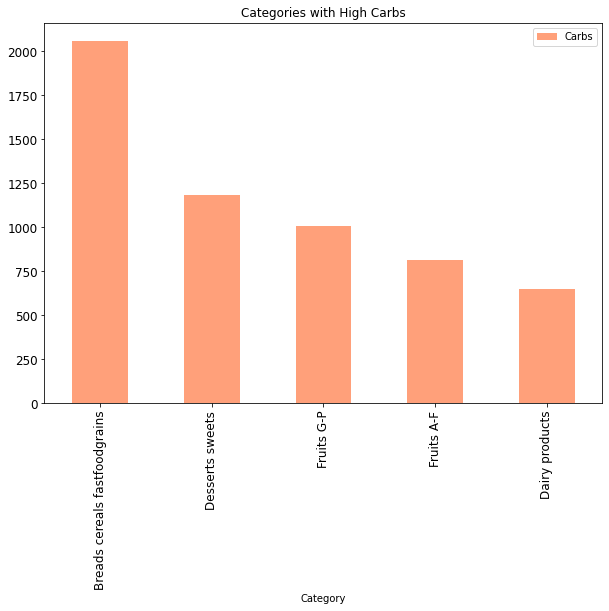

In [26]:

Carbs_5 = Category_df['Carbs'].sum().sort_values(ascending=False)[:5]
ax = Carbs_5.plot(kind='bar', title ="Categories with High Carbs", figsize=(10, 7), legend=True, fontsize=12, color='lightsalmon')


In [60]:
import matplotlib.pyplot as plt
import plotly.express as px

category_dist=df.groupby(['Category']).sum()

fig = px.pie(values=category_dist['Calories'].values, names=category_dist.index, title='CALORIES')
fig.show()
# fig = plt.figure(figsize = (12,12))
# plt.pie(category_dist['Calories'].values, labels=category_dist.index, autopct='%.1f%%')
# plt.title("CALORIES", style='oblique', fontsize=20, color='blue')
# plt.ylabel("")

In [61]:
fig = px.pie(values=category_dist['Protein'].values, names=category_dist.index, title='PROTEIN')
fig.show()

In [62]:
fig = px.pie(values=category_dist['Fat'].values, names=category_dist.index, title='FAT')
fig.show()

In [63]:
fig = px.pie(values=category_dist['Sat.Fat'].values, names=category_dist.index, title='SATURATED FAT')
fig.show()

In [64]:
fig = px.pie(values=category_dist['Fiber'].values, names=category_dist.index, title='FIBER')
fig.show()

In [65]:
fig = px.pie(values=category_dist['Carbs'].values, names=category_dist.index, title='CARBS')
fig.show()